In [1]:
import tilelit as ti

In [2]:
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# # for the first time you'll need to run through this to resize:
# for fname in ['/home/ubuntu/case01-ER_resize_10.npy', 
#               '/home/ubuntu/case01-HER2_resize_10.npy',
#               '/home/ubuntu/case01-H&E_resize_10.npy']:
#     if not op.exists(fname):
#         resized = ti.tiff_resize(fname.split('_')[0] + '.tiff')
#         print(fname.split('_')[0] + '.tiff')
#         np.save(fname, resized)

# im_er = np.load('/home/ubuntu/case01-ER_resize_10.npy')
# im_her = np.load('/home/ubuntu/case01-HER2_resize_10.npy')
# im_he = np.load('/home/ubuntu/case01-H&E_resize_10.npy')



In [4]:
im_er = np.load('/home/ubuntu/im_er_resize_10.npy')
im_her = np.load('/home/ubuntu/im_her_resize_10.npy')
im_he = np.load('/home/ubuntu/im_he_resize_10.npy')

In [5]:
im_er.shape

(3008, 2340, 4)

In [6]:
im_he.shape

(2811, 2700, 4)

In [7]:
img_er_bw = im_er[..., 2] #np.sum(im_er, -1)
img_he_bw = im_he[..., 2] #np.sum(im_he, -1)

In [8]:
img_initial, aff_initial  = ti.initial_alignment(img_er_bw, img_he_bw)

In [9]:
img_final, aff_final = ti.fine_alignment(img_er_bw, img_he_bw, starting_affine=aff_initial)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


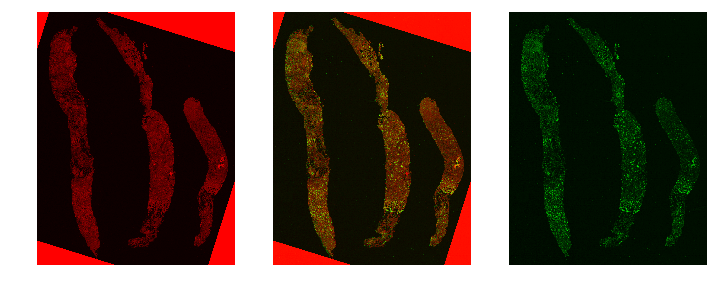

In [10]:
new_image1, new_image2 = ti.plot_together(1-(img_final/img_final.max()), 1-(img_er_bw/img_er_bw.max()))
#new_image1, new_image2 = plot_together(ax, img_final, img_er_bw)

In [11]:
aff_final

array([[   0.94912069,   -0.29666621,  231.43713181],
       [   0.30195627,    0.95456119, -138.89570469],
       [   0.        ,    0.        ,    1.        ]])

In [12]:
im_er_orig = np.load('/home/ubuntu/case01-im_er.npy')
im_he_orig = np.load('/home/ubuntu/case01-im_he.npy')

In [203]:
im_er_orig.shape, im_he_orig.shape

((30086, 23400, 4), (28114, 27000, 4))

In [191]:
box_size = (1000, 1000)

In [192]:
y_center = round(np.random.rand() * (im_er_orig.shape[0] - box_size[0]//2) + box_size[0] // 2)

In [193]:
x_center = round(np.random.rand() * (im_er_orig.shape[1] - box_size[1]//2) + box_size[1] // 2)

In [194]:
x_coords, y_coords = np.meshgrid(np.arange(x_center - box_size[1] // 2, x_center + box_size[1] // 2),
                                 np.arange(y_center - box_size[0] // 2, y_center + box_size[0] // 2))

In [195]:
coords = np.array(list(zip(x_coords.ravel(), y_coords.ravel(), np.ones(np.product(box_size))))).astype(int)

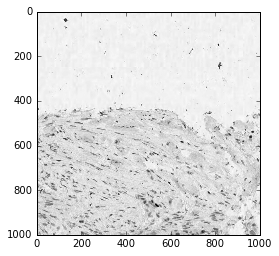

In [196]:
plt.imshow(im_er_orig[(coords[:, 0], coords[:, 1])].reshape(box_size + (-1, ))[..., 2], cmap='gray')

In [197]:
aff_orig = np.copy(aff_final)
aff_orig[:, 2] = aff_orig[:, 2] * 10
aff_orig, aff_final

(array([[  9.49120687e-01,  -2.96666207e-01,   2.31437132e+03],
        [  3.01956272e-01,   9.54561188e-01,  -1.38895705e+03],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+01]]),
 array([[   0.94912069,   -0.29666621,  231.43713181],
        [   0.30195627,    0.95456119, -138.89570469],
        [   0.        ,    0.        ,    1.        ]]))

In [198]:
trans_coords = (np.round(np.dot(aff_orig, coords.T))).T.astype(int)

In [199]:
he_trans = im_he_orig[(trans_coords[:, 0], trans_coords[:, 1])].reshape(box_size + (-1, ))

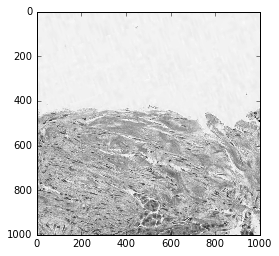

In [200]:
plt.imshow(he_trans[..., 2], cmap='gray')

(array([[244, 243, 243, ..., 242, 242, 244],
        [244, 243, 243, ..., 242, 242, 242],
        [244, 243, 243, ..., 242, 242, 242],
        ..., 
        [179, 167, 173, ..., 243, 241, 237],
        [154, 160, 168, ..., 243, 241, 237],
        [164, 161, 169, ..., 244, 244, 241]], dtype=uint8),
 array([[240, 239, 239, ..., 243, 243, 243],
        [240, 239, 239, ..., 243, 243, 243],
        [240, 239, 239, ..., 243, 243, 243],
        ..., 
        [212, 200, 221, ..., 239, 239, 239],
        [213, 207, 190, ..., 239, 238, 239],
        [223, 235, 195, ..., 238, 237, 236]], dtype=uint8))

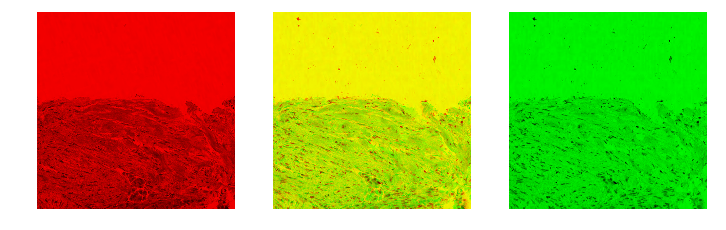

In [201]:
ti.plot_together(he_trans[..., 2], im_er_orig[(coords[:, 0], coords[:, 1])].reshape(box_size + (-1, ))[..., 2])